# plt_colors


## TO-DO 
1. en show_plt_palettes que me permita ingresar la/las paleta como argumento
- por qué quiero hacer esto?:
    1. Para ver si ciertas paletas existen de modo de:
    2. Determinar todas las paletas secuenciales para:
    3. Que en el pie chart las NO secuenciales NO eliminen los extremos
- igual, YA VEREMOS, porque por ahí lo que conviene es UNICAMENTE eliminar los extremos si la palette NO ES Qualitative
1. También el show palettes que me muestre las listas escritas listas COMPLETAS (no solo las que se muestran)

In [37]:
# Standard Libs
from typing import Optional, Union
import random

# Third-Party Libs
import matplotlib.pyplot as plt

# Local Libs
from jm_utils.data import plt_functions as plt_func
from jm_utils.data.plt_functions import to_series

plt_func.__version__

'0.1.0'

In [38]:
# dir(plt_func)
# fig = plt_func.show_plt_palettes('Cyclic')

In [39]:
    sequential = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 
                 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    
    print("Secuenciales:")
    print(sequential)
    print()
    
    # Colormaps divergentes
    diverging = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
                'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
    
    print("Divergentes:")
    print(diverging)
    print()
    
    # Colormaps cualitativos
    qualitative = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                  'Dark2', 'Set1', 'Set2', 'Set3',
                  'tab10', 'tab20', 'tab20b', 'tab20c']

Secuenciales:
['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

Divergentes:
['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']



## Show Palettes - Modificaciones
1. Que permita el ingreso de la o las paletas que se quieren ver - YA ESTANA je!!
    - Si ingresas una lista en vez de un string!!!
2. Que imprima las lista de nombres completas 

In [60]:
def get_color_list(palette: str, n_items: Optional[int] = 10) -> list[str] | list[tuple[float, float, float, float]]:
    """
    | Return a valid matplotlib palette list    | 'colorblind' is a kind of sns.colorblind 
    - Qualitatives (Cat) = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent', 'colorblind']
    - Sequential (Order) = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
    - Diverging (MidPoint) = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
    - Cyclic (Repeat)= ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
    - Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']
    """
    if palette == 'colorblind':
        color_list = [
                    '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
                    '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
                    '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
                    '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
                    '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
                    '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
                ]
    else:
        cmap = plt.get_cmap(palette, n_items)             # Use palette colormap
        color_list = [cmap(i) for i in range(n_items)]    # Get colors from the colormap

    return color_list


def show_plt_palettes(
        palette_group: Union[str, list[str]] = 'Sample',
        n_items: Optional[int]=14,
) -> plt.Figure:
    # Verified n_times parameter
    if not isinstance(n_items, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_items)}'.")

    if n_items < 1 or n_items > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_items}'.")
    n_items = int(n_items) + 1

    # Palette_group selection + custom palette_group and palette_group parameter validation
    Custom = []                             # Default empty list for custom palettes
    if isinstance(palette_group, str):
        palette_group_key = palette_group.strip().capitalize()
    elif isinstance(palette_group, list):
        palette_group_key = 'Custom'
        Custom = palette_group
    else:
        raise TypeError(f"'palette_group' parameter not valid. Must be a string or a list. Got {type(palette_group)}.")
    
    # 1. Native palette Group lists
    Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                    'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

    Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
              'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
                'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

    Diverging = ['BrBG', 'BrBG_r', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn',
                 'PRGn_r', 'PuOr', 'PuOr_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdYlBu',
                 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'seismic', 'Spectral', 'Spectral_r']

    Cyclic = ['berlin', 'berlin_r', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'gist_rainbow_r', 'hsv',
              'hsv_r', 'jet', 'jet_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'rainbow',
              'rainbow_r', 'twilight', 'twilight_r','twilight_shifted', 'turbo', 'turbo_r', 'vanimo', 'vanimo_r']

    # 2. Get the palette group (and _desc) based on the input string (the one selected by the user)
    palette_group_dic = {
        'Qualitative': (Qualitative, 'for categorical data'),
        'Sequential': (Sequential, 'for data that has an order'),
        'Diverging': (Diverging, 'for data that have a significant midpoint'),
        'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
        'Custom': (Custom, 'user selected palettes'),
    }

    defaults_for_sample = ('Sample', 'a sample of four of each category')
    # Get the list of palettes for the selected group and its description
    selected_palettes, palette_group_desc = palette_group_dic.get(palette_group_key, defaults_for_sample)

    # Adjust the palette_group for the 'Sample' (four from each group)) case. Any value different from the main groups
    if palette_group_key not in ('Qualitative', 'Sequential', 'Diverging', 'Cyclic', 'Custom'):
        palette_group_key = 'Sample'                      
        palette_group = [palette for p_g in [Qualitative, Sequential, Diverging, Cyclic] for palette in random.sample(p_g, k=4)]
    else:                                                   # If not 'Sample' (all others, custom included), use the selected palettes  
        palette_group = selected_palettes                   # Assign the actual list if not 'Sample'

    # Build a Series of n_items elements to show colors
    sr = to_series({str(i): 1 for i in range(1, n_items)})

    # Create a figure with two columns for the palettes - Bar charts showing palette colors
    rows = len(palette_group) // 2 if len(palette_group) % 2 == 0 else (len(palette_group) // 2) + 1
    width = 12
    height = rows / 1.25 if rows > 6 else rows / 1.05 
    
    fig, axs = plt.subplots(rows, 2, figsize=(width, height), tight_layout=True, sharex=True)

    # Set the figure title with the palette group key and description
    fig.suptitle(f"Matplolib {palette_group_key} palettes (cmap): {palette_group_desc}", fontsize=14, fontweight='medium', y=1.001)

    if palette_group_key == 'Sample':
        fig.text(0.15, 0.95, "4 Qualitative (for categorical data), 4 Sequential (for ordered data),"
                             "4 Diverging (significant midpoint), and 4 Cyclic (for repeated data)",
                    fontsize=10, transform=fig.transFigure)

    # Iterate over the axes and palette group to plot each palette                                           
    for ax, pltt in zip(axs.flatten(), palette_group):
        try:
            color_list = get_color_list(pltt, n_items=n_items)
            ax.bar(sr.index, sr, color=color_list, width=1, edgecolor='white', linewidth=0.2)
            ax.set_xlim(-0.5, n_items - 1.5)
            ax.set_ylim(0, 0.1)
            ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
        except ValueError:
            err_msg = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
            ax.set_title(err_msg, loc='left', fontsize=10, fontweight='medium', color='red')

        ax.set_yticks([])       # Hide y-ticks for cleaner look
        ax.set_xticks([])       # Hide x-ticks

    plt.show()
    return fig                  # Return the current figure for further manipulation if needed

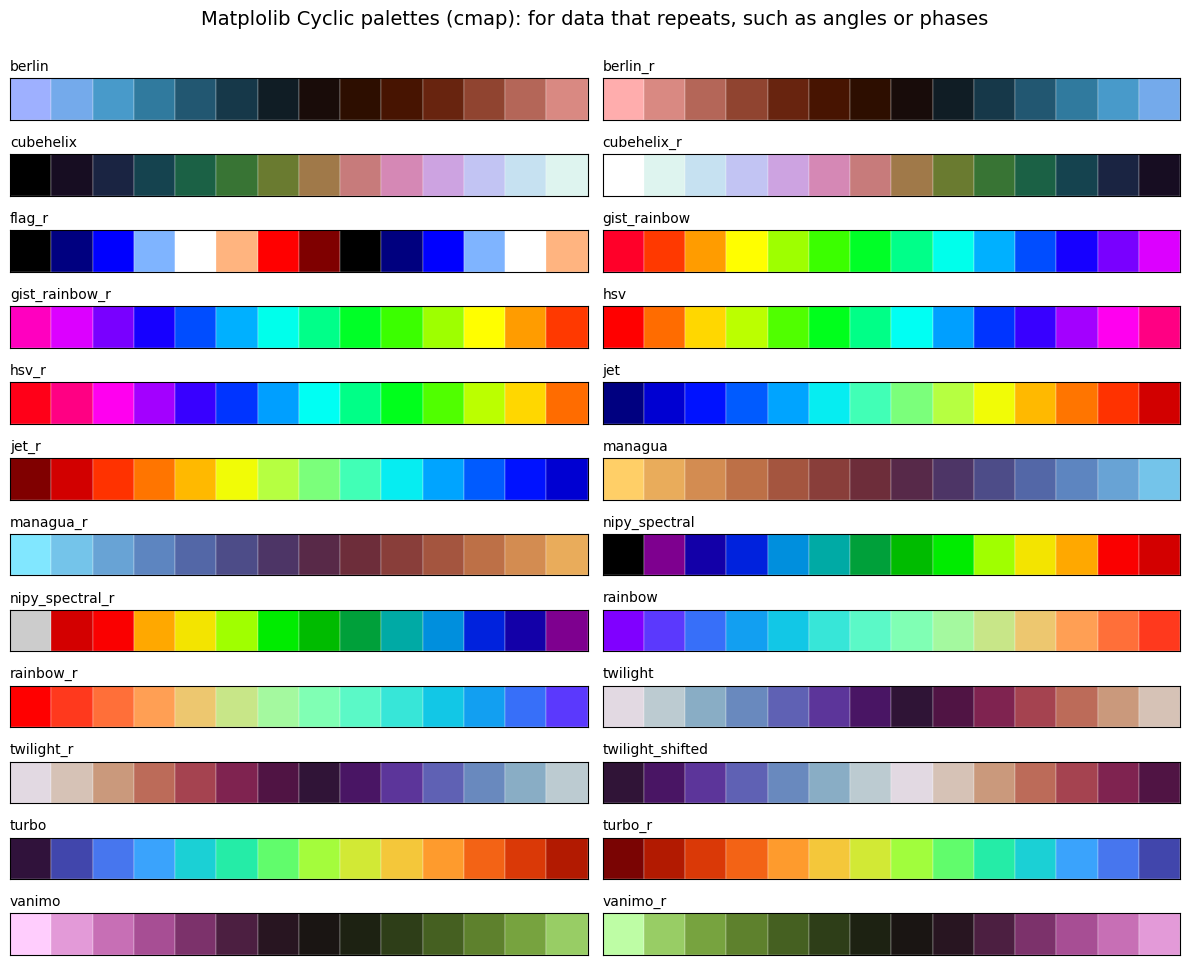

In [61]:
# fig = show_plt_palettes(['PiYG', 'PRGn', 'BrBG', 'PuOr'])
fig = show_plt_palettes('cyclic')

In [42]:
l = [i + 1 for i in range(10)]
l[1:-1]

[2, 3, 4, 5, 6, 7, 8, 9]